## Lentimix Library1-all lanes
7/30/2023 - Data generated from Lentimix Library from 4/2022
Run on 6 Chromium X lanes
Analyze global run on cellranger v6 data and create h5_ad files for further analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import pickle

import math
import matplotlib

import anndata
from pathlib import Path

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_85324/3040447381.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Path("./write").mkdir(parents=True, exist_ok=True) # write h5ad here

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.settings.n_jobs = 4
np.random.seed(1573)   #fix so we can reproduce later

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.3 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.11.3 pynndescent==0.5.11


In [4]:
results_file = 'write/allmice.h5ad'  # the file that will store the analysis results

In [5]:
library = ["1659-Fosl2.226","1660-Fosl2.752","1661-Fhl2.467","1662-Fhl2.179","1663-Myc.989","1664-Myc.1389","1665-Yap1.735","1666-Yap1.2847","1667-Atf4.1383","1668-Atf4.536","1669-Maff.85","1670-Maff.587","1671-Nfkb2.152","1672-Nfkb2.534","1673-Relb.286","1674-Relb.1795","1675-Onecut2.1799","1676-Onecut2.2361","1810-Slc4a11.541","1934-Slc4a11.1966","1811-Itga2.672","1812-Itga2.204","1998-Cldn4-1013","1999-Cldn4-951","2113-Lif.440","2114-Lif.1890","2115-Fosl1.1401","2116-Fosl1.699","2117-Nfkb1.2331","2118-Nfkb1.3737",'shRenilla']

In [6]:
clibrary = ['1660-Fosl2.752', '1661-Fhl2.467', '1663-Myc.989', '1665-Yap1.735',
       '1667-Atf4.1383', '1671-Nfkb2.152', '1673-Relb.286',
       '1676-Onecut2.2361', '1811-Itga2.672', '1999-Cldn4-951',
       '2114-Lif.1890', '2115-Fosl1.1401', '2118-Nfkb1.3737', 'shPatch', 'shRenilla']

In [7]:
tags = ["shRenilla_TGTCTAGT", "shRenilla_CATAGTCA", "shPatch_GTACTTGC", "shPatch_CCATTACT", 
        "1660-Fosl2.752_CGGGAATG", "1661-Fhl2.467_GCCTACGT", "1663-Myc.989_CTGAATCT",  "1665-Yap1.735_CGTTAGGG",
        "1667-Atf4.1383_TCTGGGGC", "1671-Nfkb2.152_CGTTCAAG", "1673-Relb.286_ACAGAGCC", 
        "1676-Onecut2.2361_TTAATTAG", "1811-Itga2.672_GCCAATCG", "1999-Cldn4-951_CGTTTCCT", 
        "2114-Lif.1890_ACACGTGA", "2115-Fosl1.1401_GGTAGGGA", "2118-Nfkb1.3737_CAGTGCAT"]

In [8]:
targetGenes = ['Fosl2', 'Fhl2', 'Myc', 'Yap1', 'Atf4', 'Nfkb2', 'Relb', 'Onecut2', 'Itga2', 'Cldn4', 'Lif', 'Fosl1', 'Nfkb1', 'Slc4a11', 'Tigit']

Read in the count matrix into an [`AnnData`](https://anndata.readthedocs.io/en/latest/anndata.AnnData.html) object, which holds many slots for annotations and different representations of the data. It also comes with its own HDF5 file format: `.h5ad`.

In [9]:
adata_A = sc.read_h5ad('A/write/allmice-tumornoSCT.h5ad')
adata_B = sc.read_h5ad('B/write/allmice-tumornoSCT.h5ad')
adata_B_2 = sc.read_h5ad('B_2/write/allmice-tumornoSCT.h5ad')
adata_C = sc.read_h5ad('C/write/allmice-tumornoSCT.h5ad')
adata_D = sc.read_h5ad('D/write/allmice-tumornoSCT.h5ad')
adata_E = sc.read_h5ad('E/write/allmice-tumornoSCT.h5ad')

In [10]:
adatas = [adata_A, adata_B, adata_B_2, adata_C, adata_D, adata_E]

In [11]:
# Create an empty set and update it with each list of categories
samples = set()
for ad in adatas:
    samples.update(ad.obs.Classification.cat.categories)

In [12]:
print(samples)

{'AM1064_B0302', 'AN1973_B0301', 'AM1062_B0301', 'AN1640_B0306', 'AO1376_B0302', 'AN1975_B0306', 'AO1376_B0301', 'AM1818_B0303', 'AN1653_B0305', 'AO1290_B0303', 'AM1854_B0305', 'AO1092', 'AN1062_B0304', 'AO1721_B0303', 'AM1153_B0304', 'AO1372_B0305', 'AM1073_B0302', 'AM1063_B0305', 'AO1088_B0303', 'AM1774_B0301', 'AN1028_B0304', 'AO1093_B0304', 'AO1092_B0303', 'AM1815_B0301', 'AO1092_B0306', 'AO1374_B0302', 'AM1817_B0304', 'AO1292_B0305', 'AO1089_B0302'}


In [13]:
for x in range(0, len(adatas)):
    adatas[x].var['mt'] = adatas[x].var_names.str.startswith('mt-') # annotate the group of mitochondrial genes as 'MT'
    sc.pp.calculate_qc_metrics(adatas[x], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

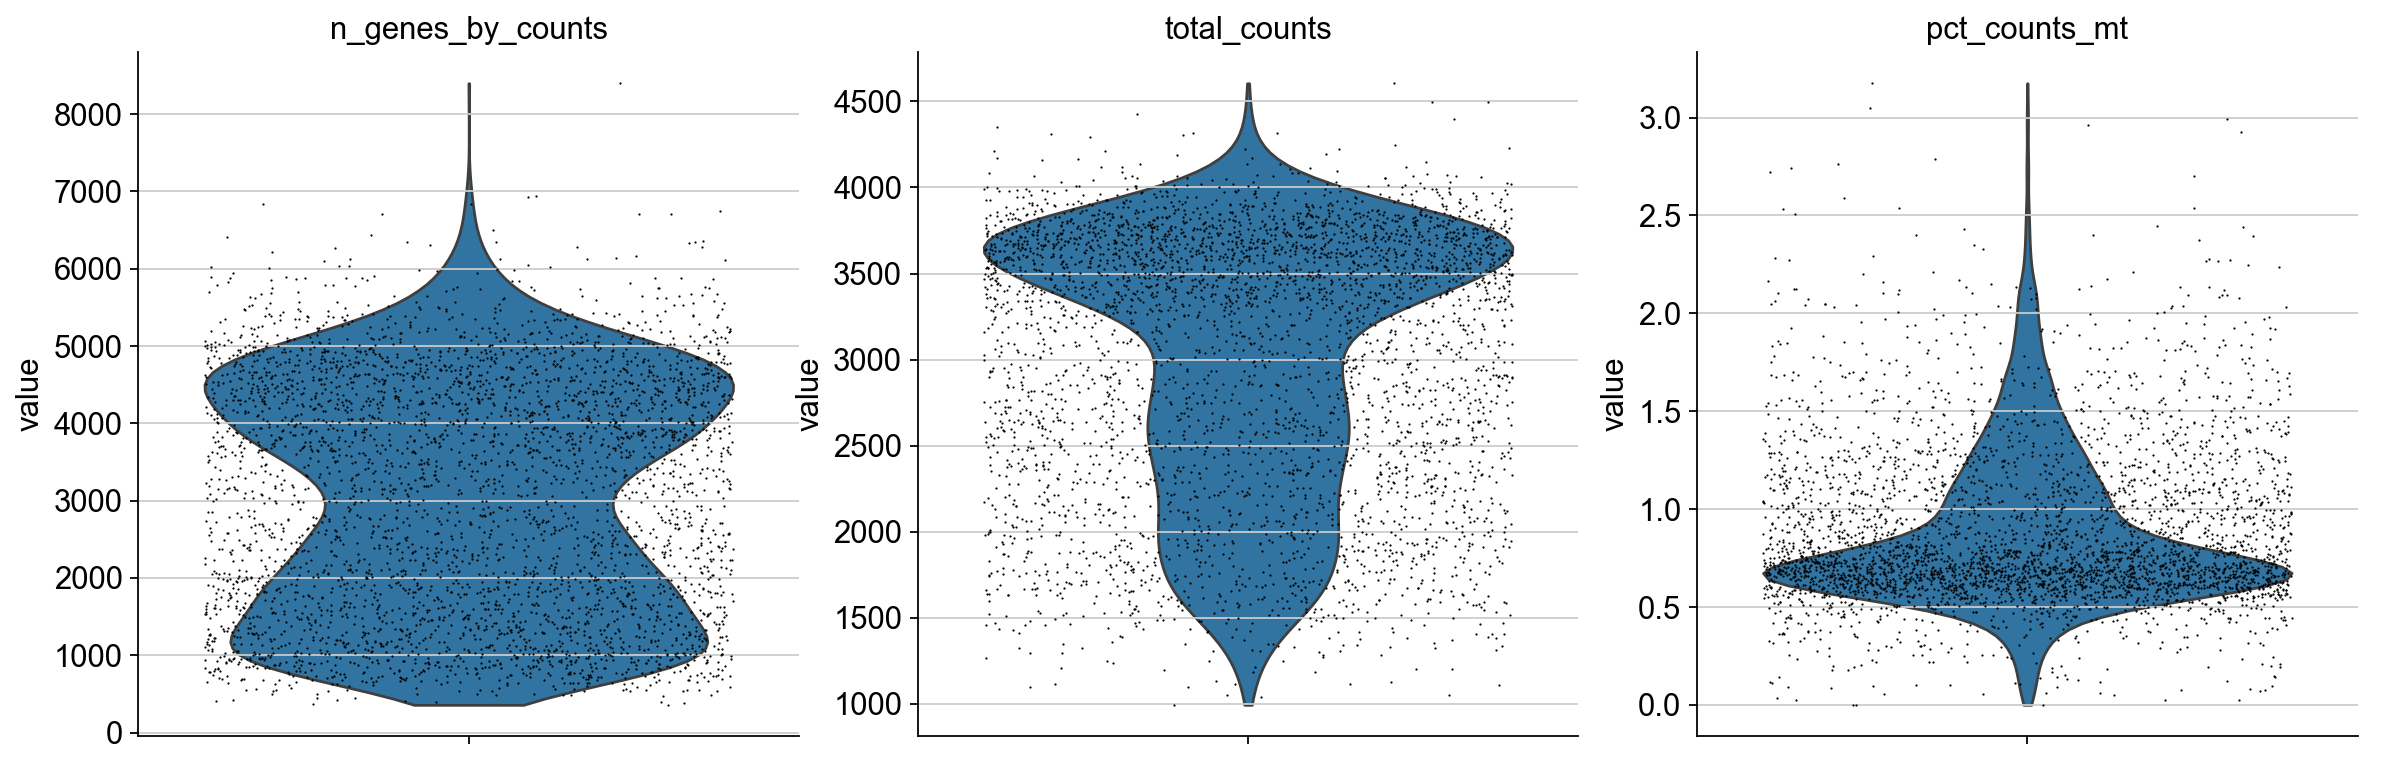

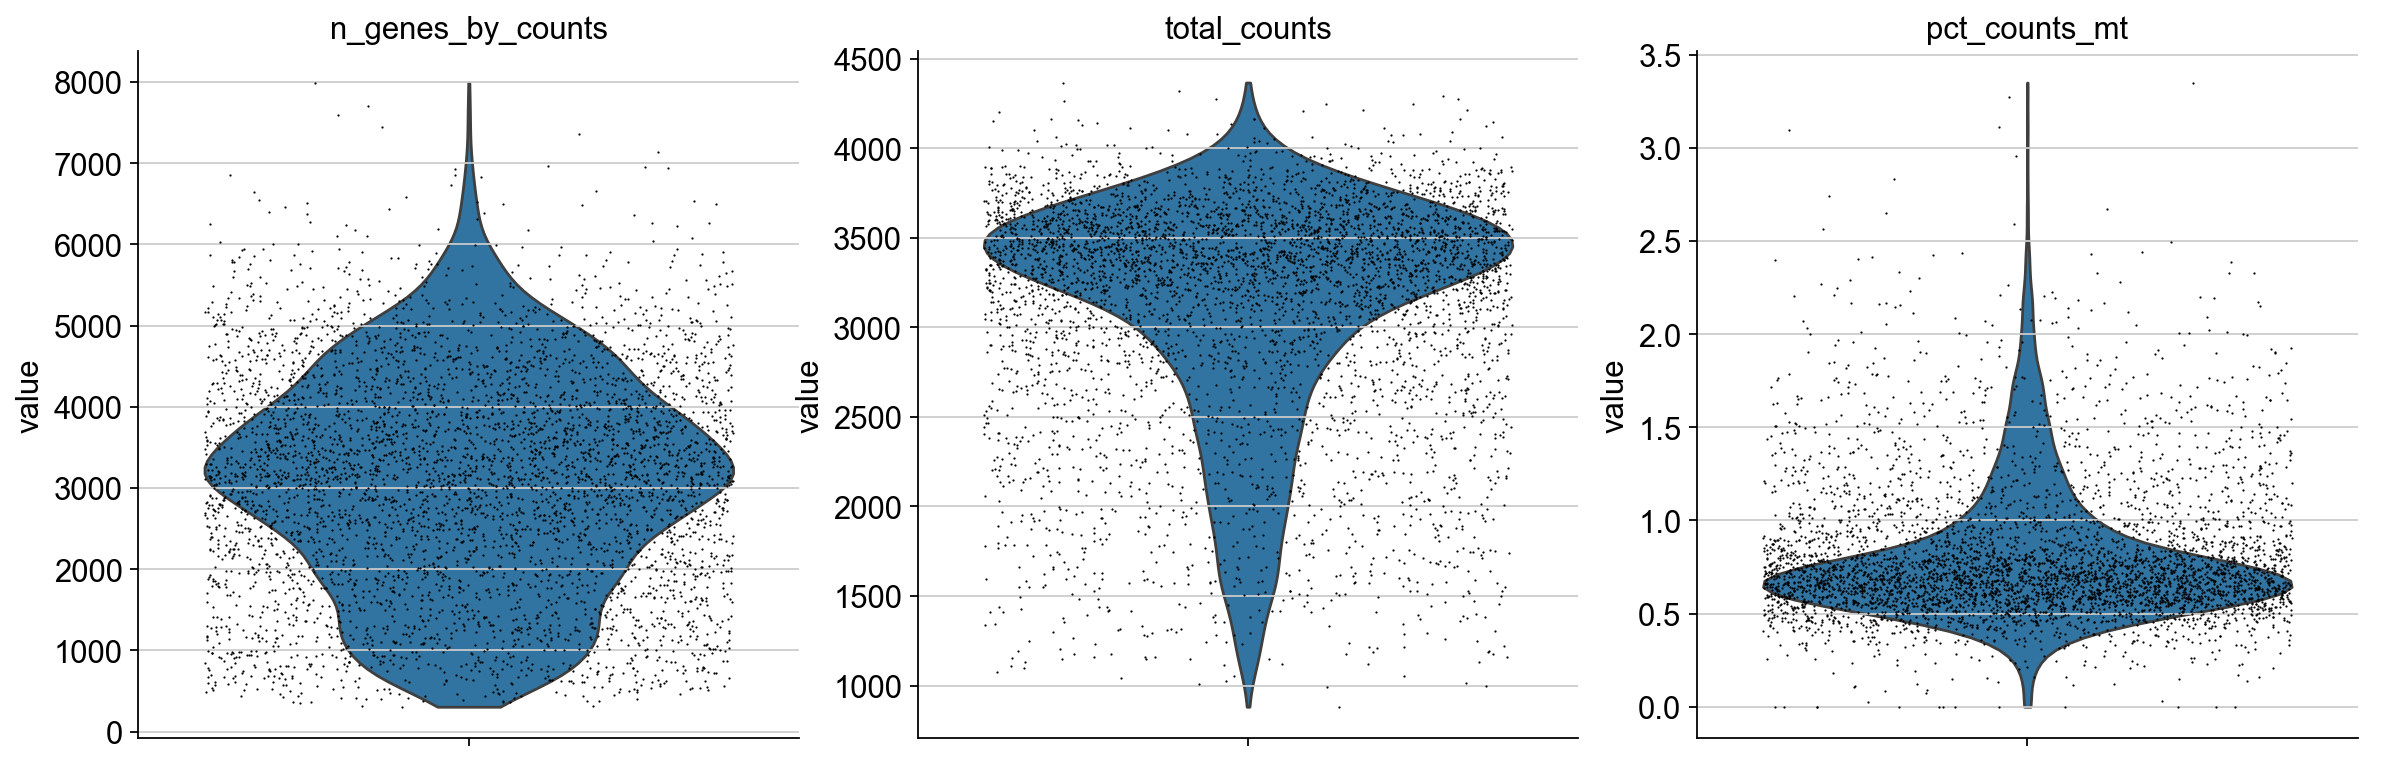

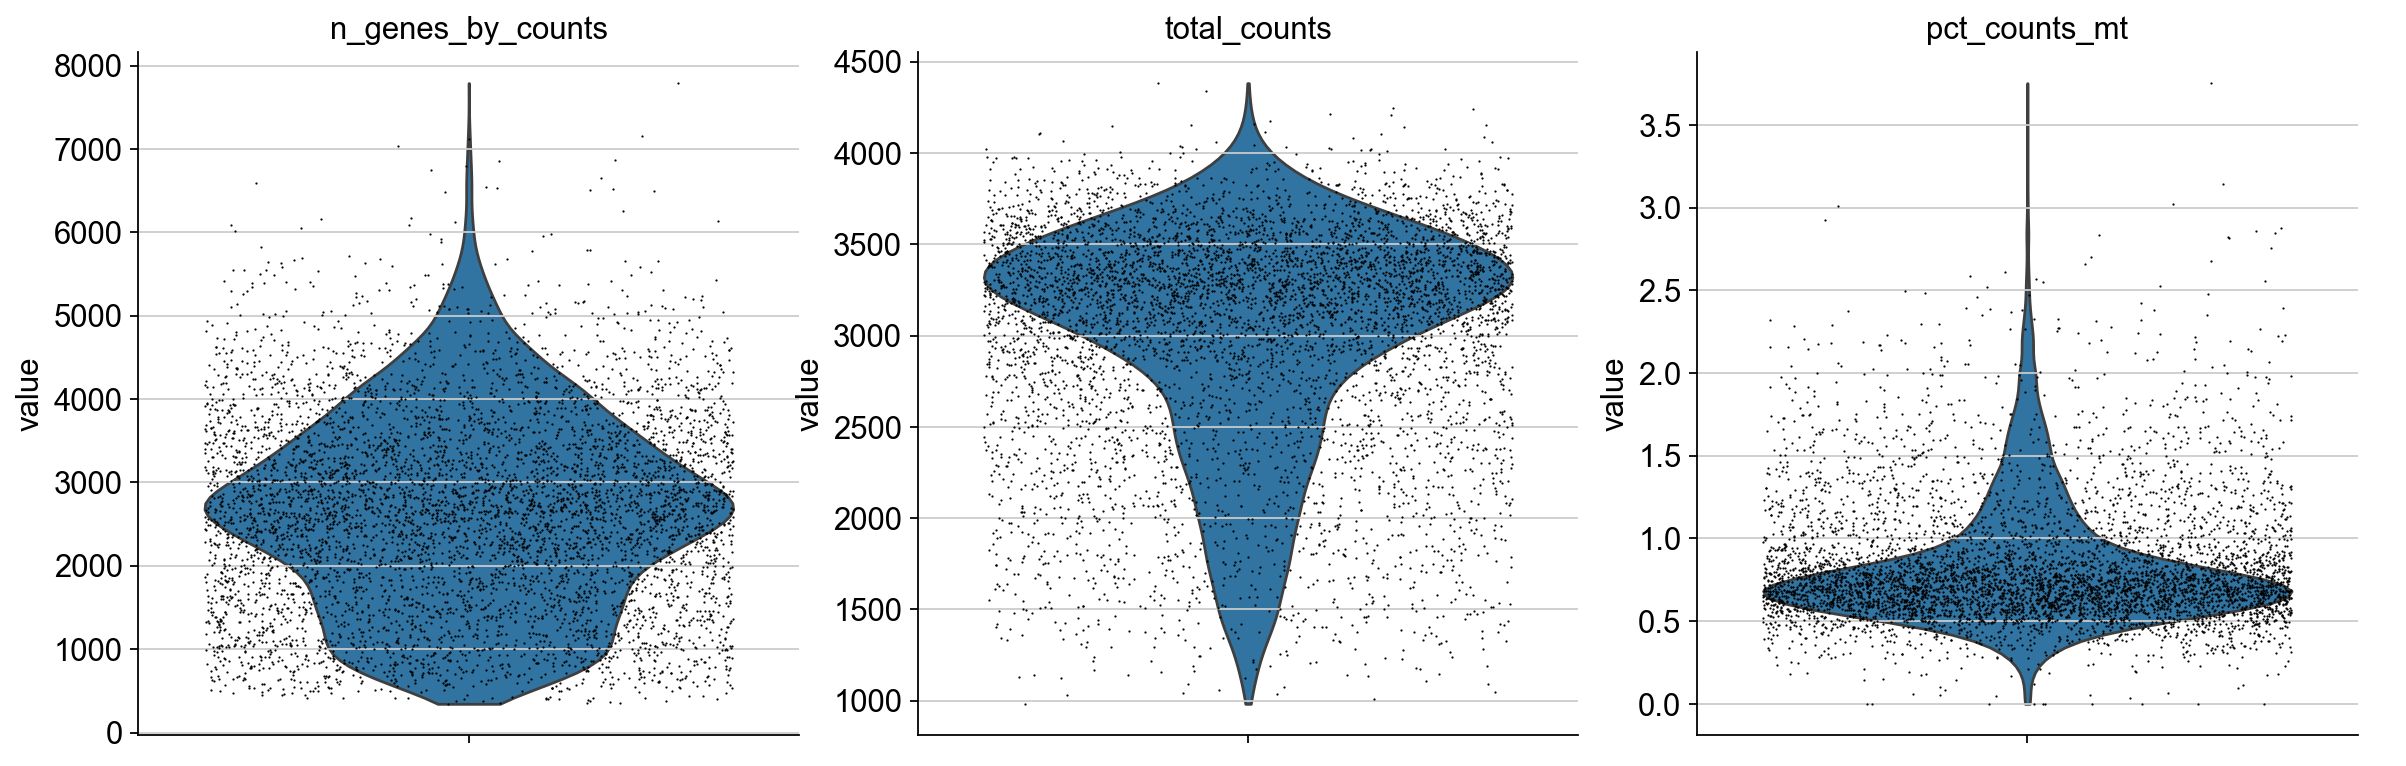

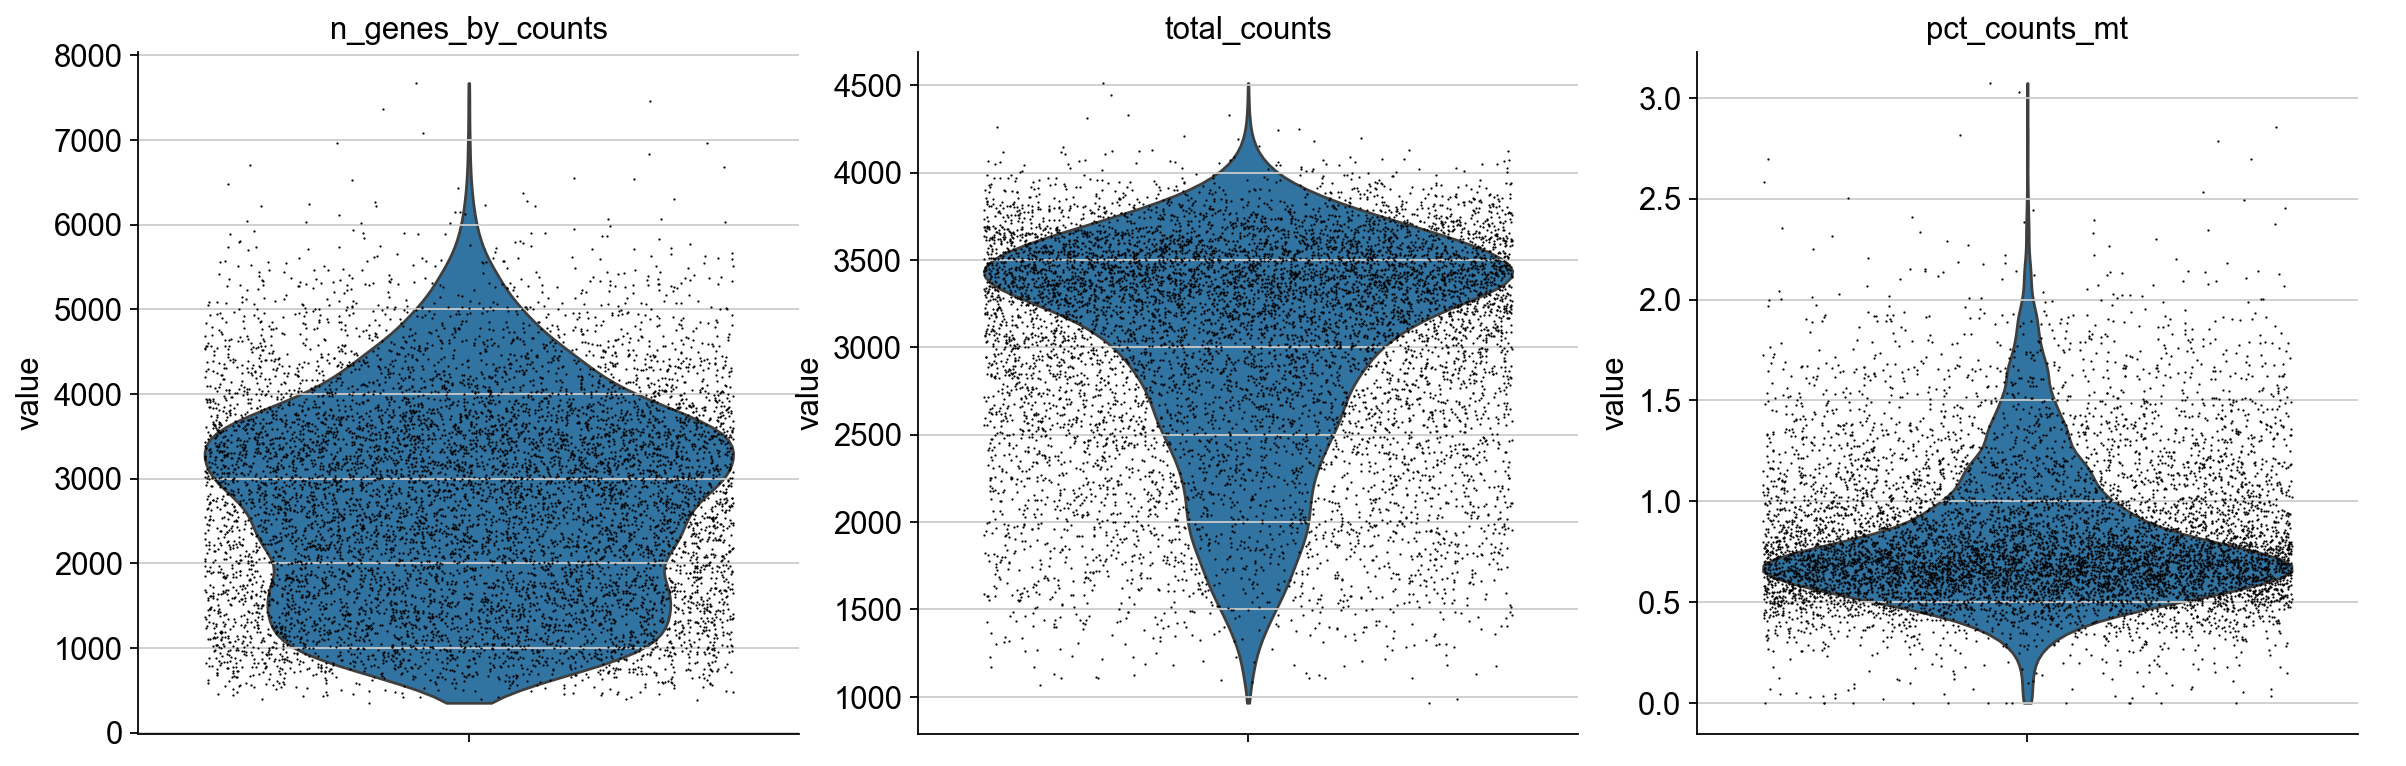

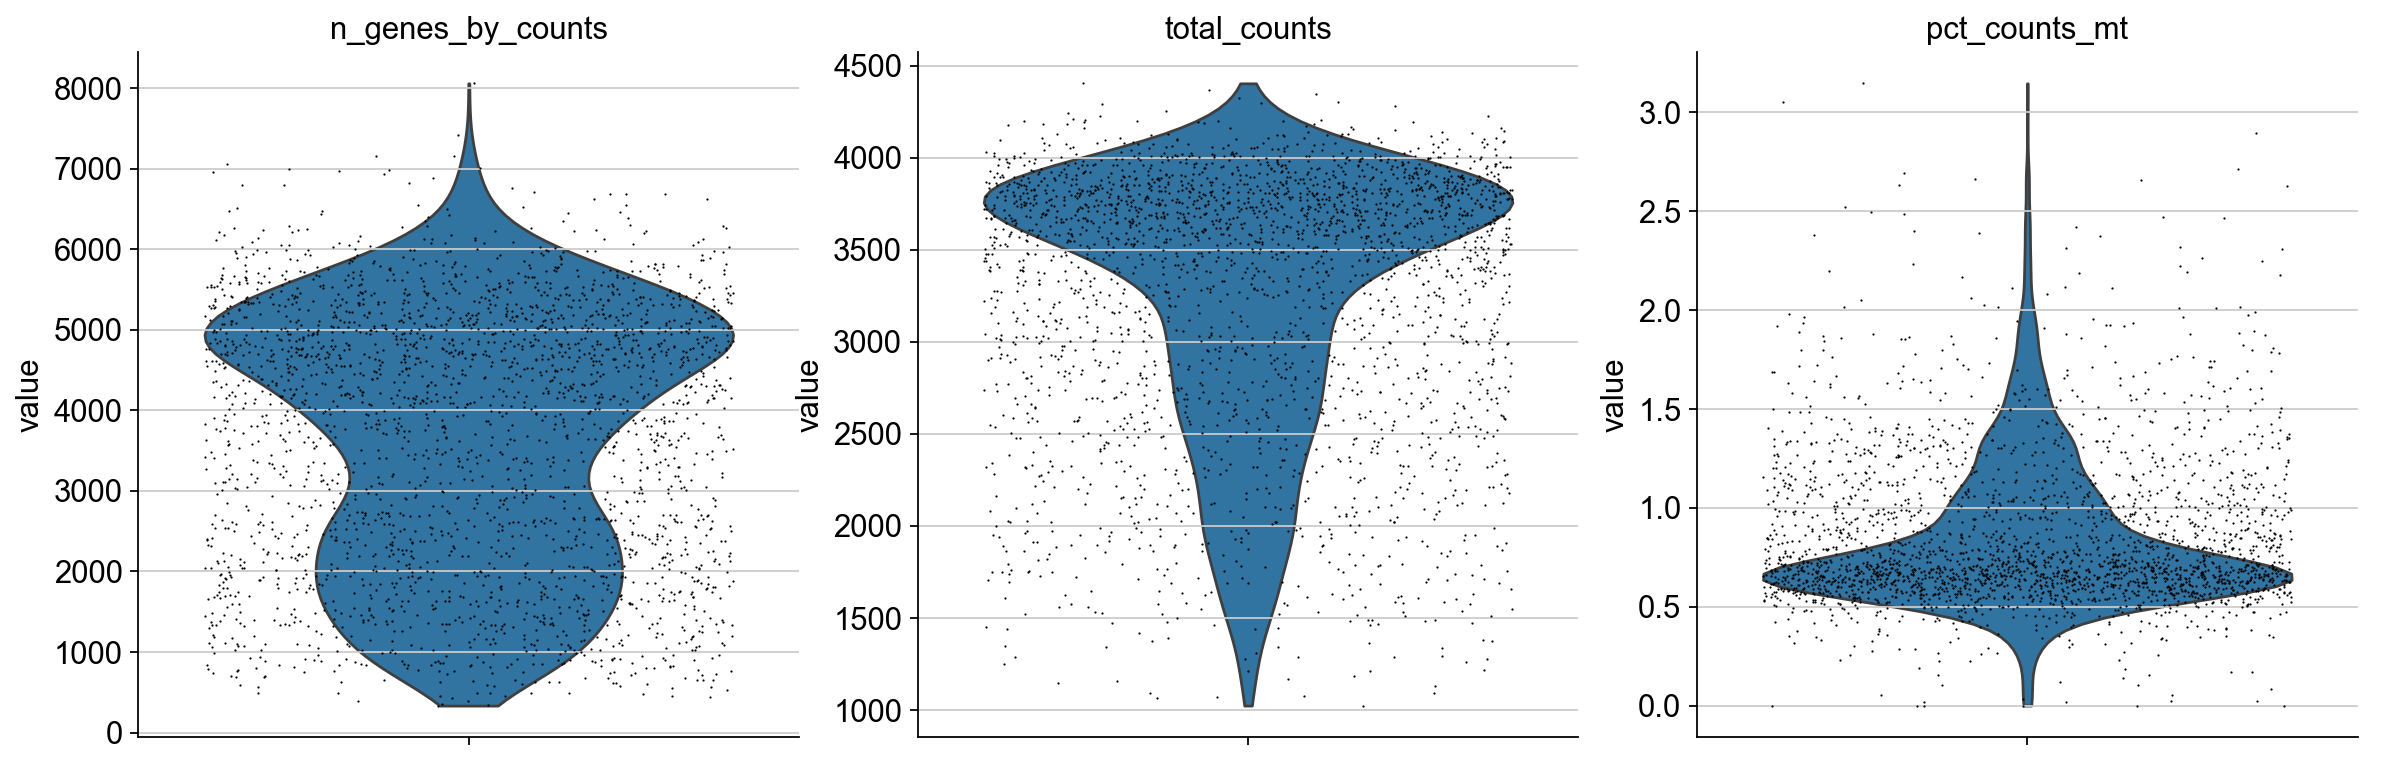

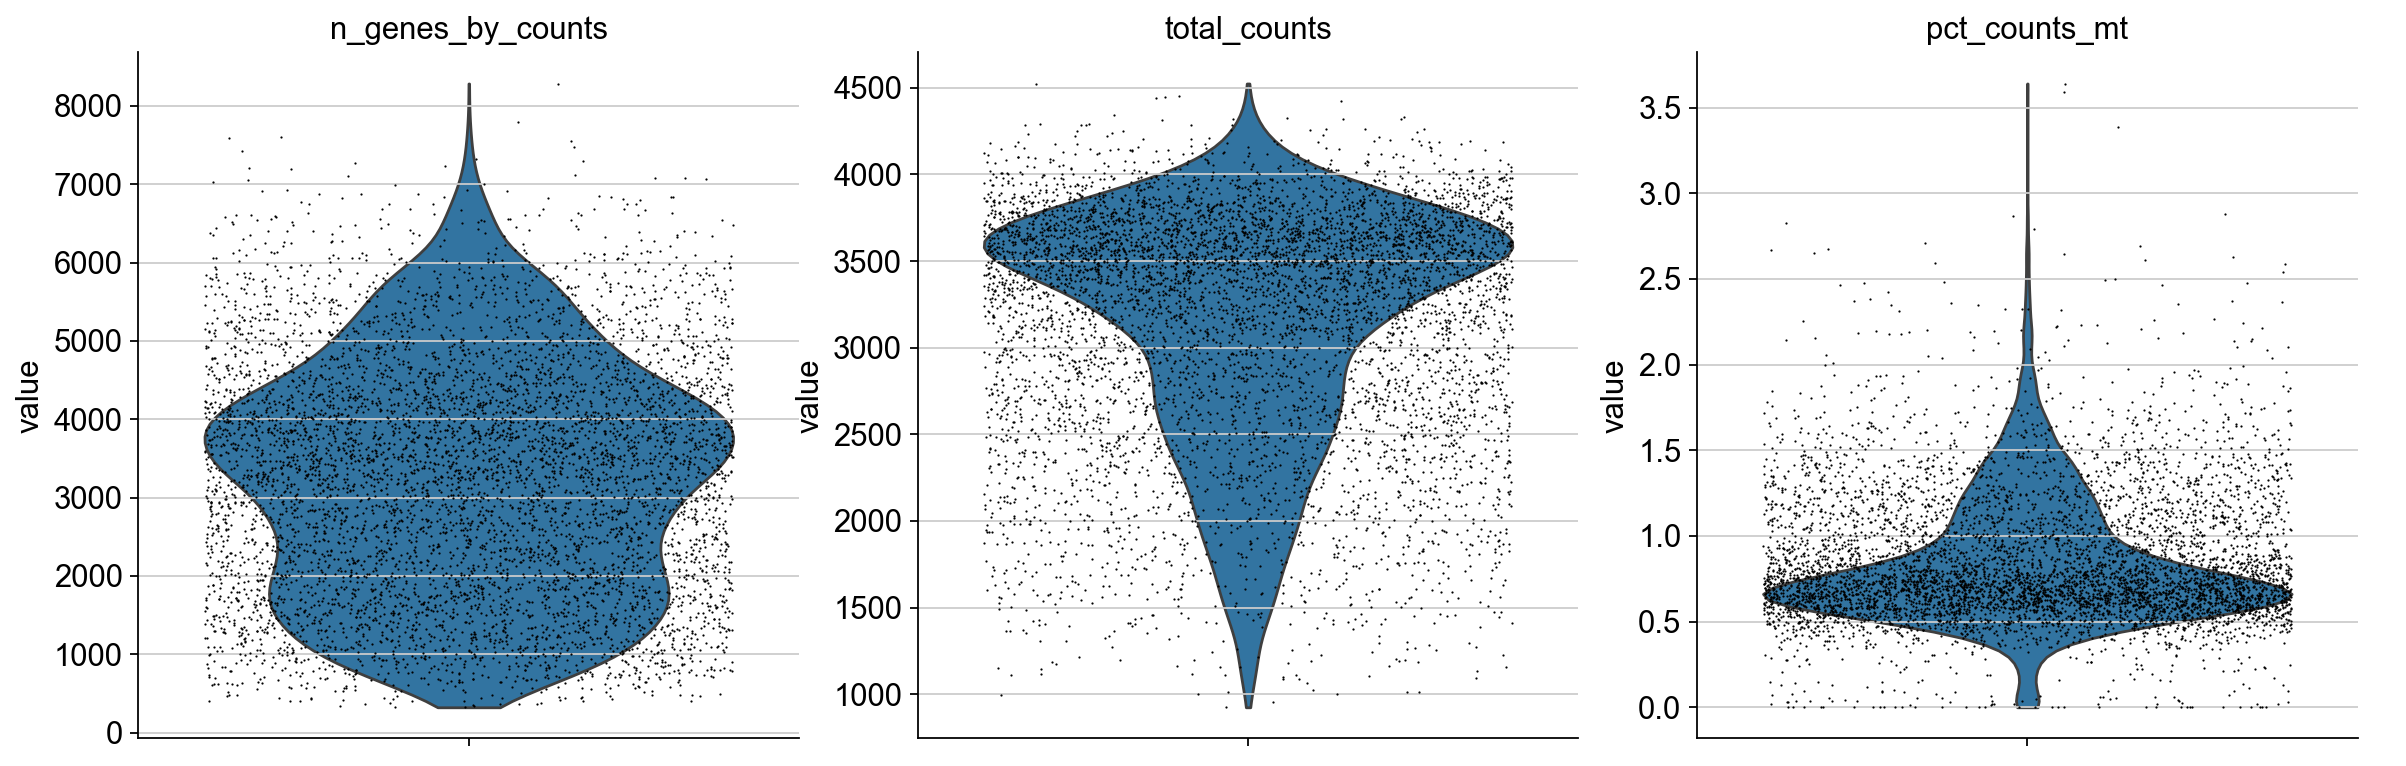

In [14]:
for x in range(0, len(adatas)):
    sc.pl.violin(adatas[x], ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                 jitter=0.4, multi_panel=True, rotation=90) #groupby='Classification',

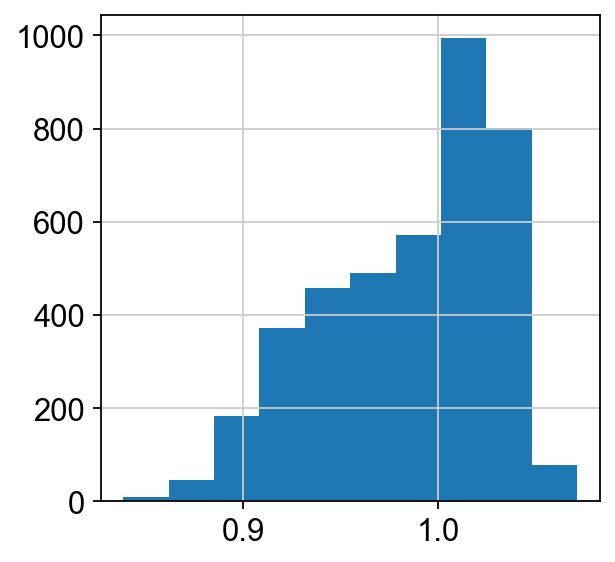

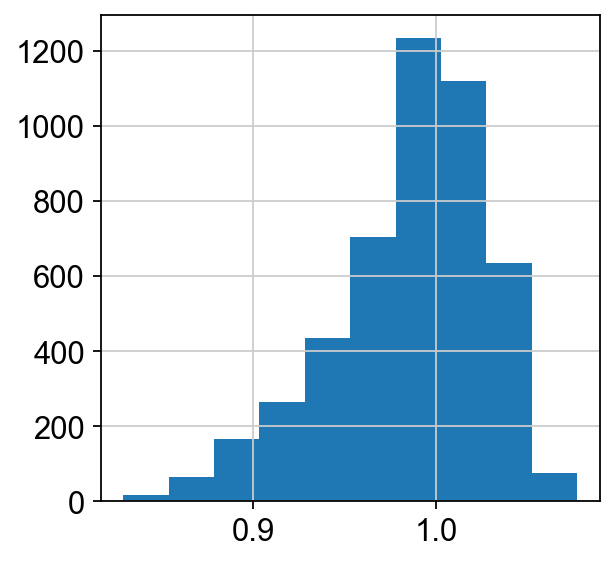

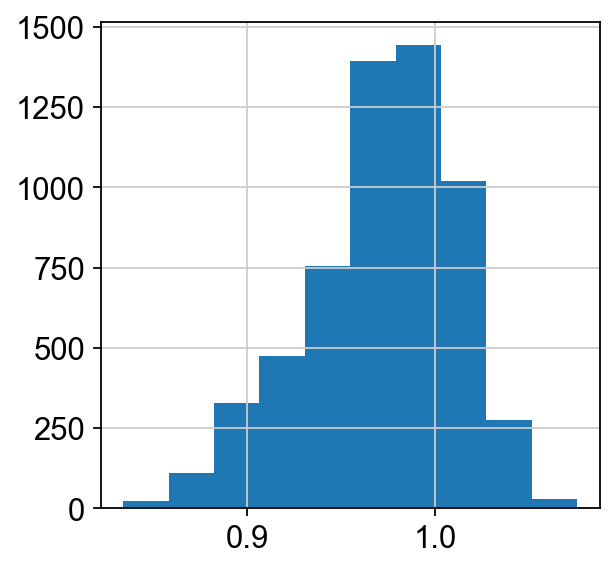

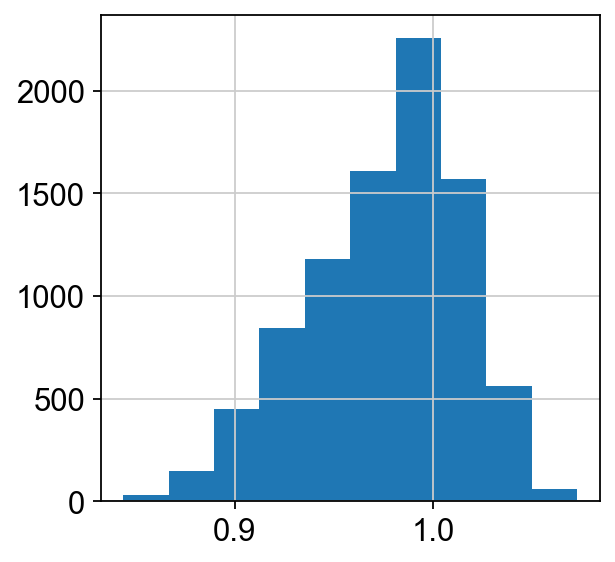

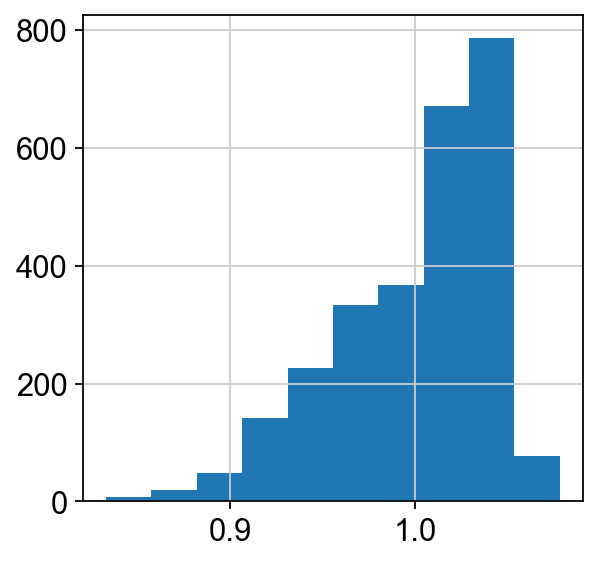

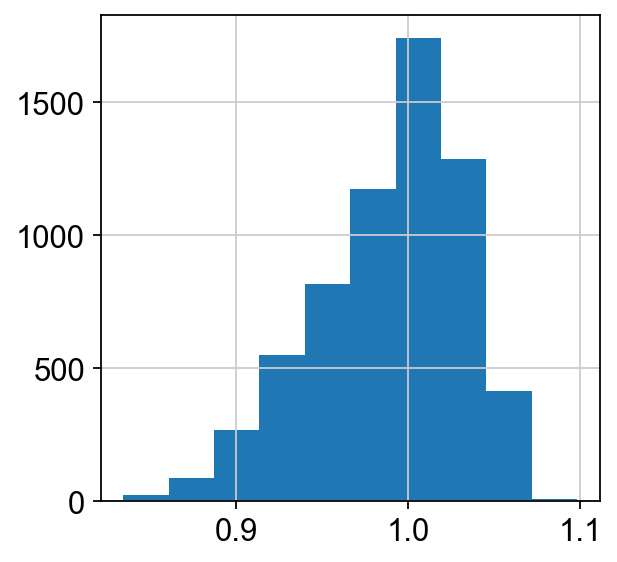

In [15]:
for x in range(0, len(adatas)):
    adatas[x].obs["log10GenesPerUMI"] = adatas[x].obs['n_genes_by_counts'].apply(math.log10) / adatas[x].obs['total_counts'].apply(math.log10)
    matplotlib.pyplot.hist(adatas[x].obs["log10GenesPerUMI"])
    matplotlib.pyplot.show()

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


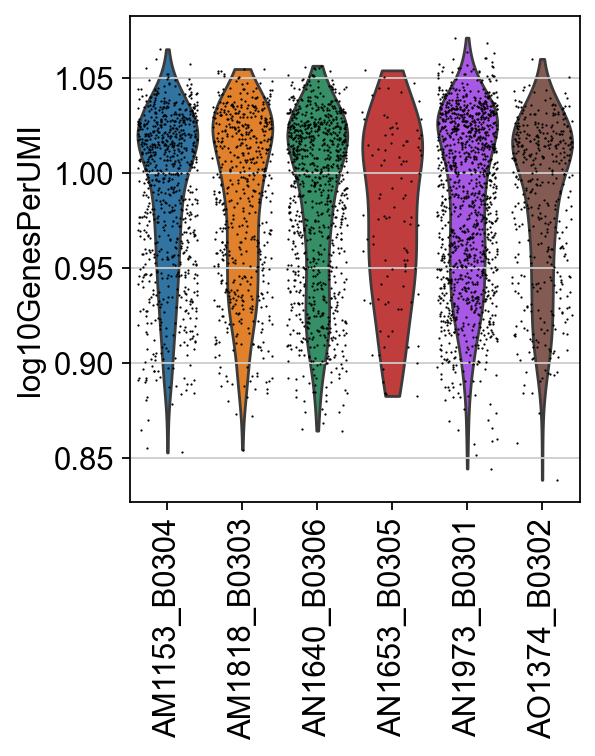

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


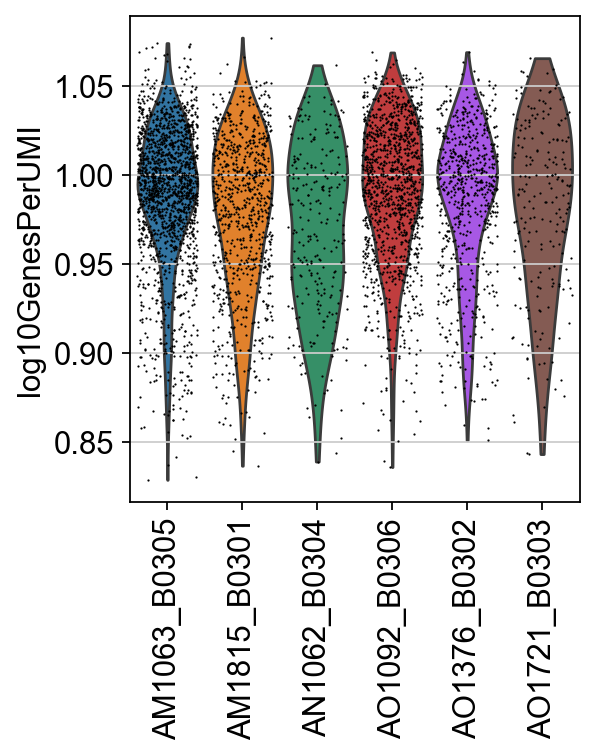

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


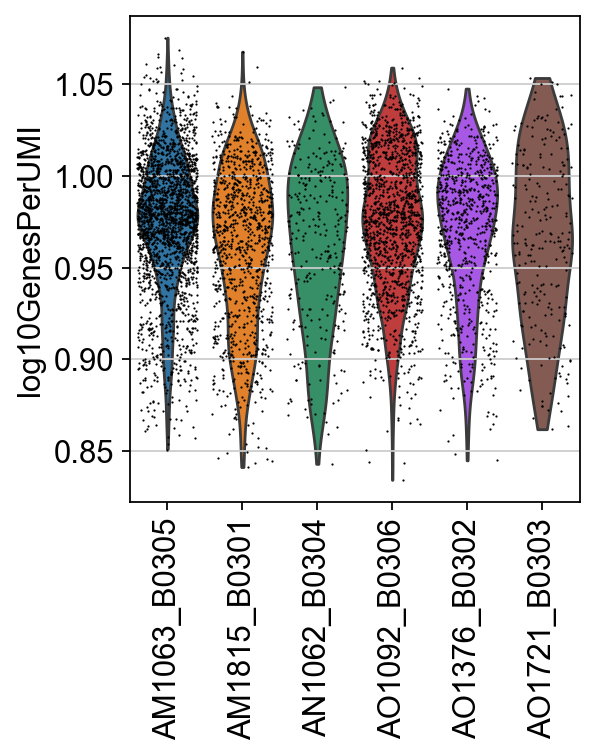

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


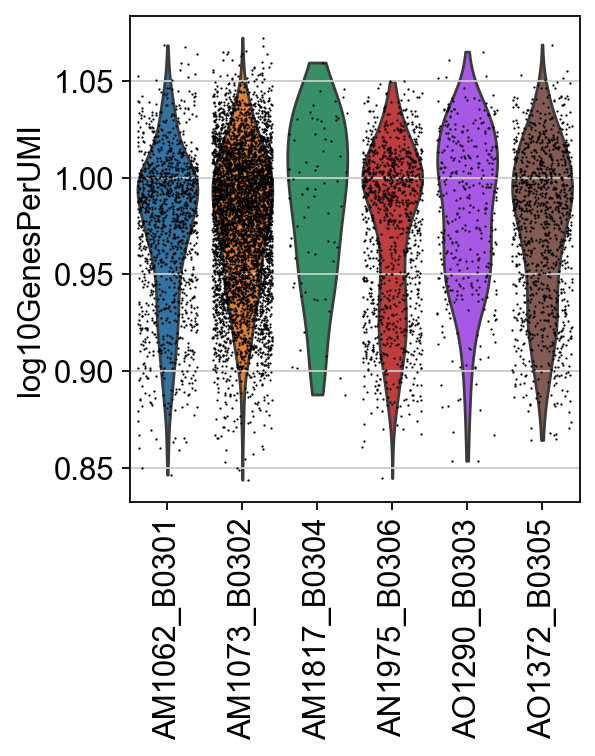

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


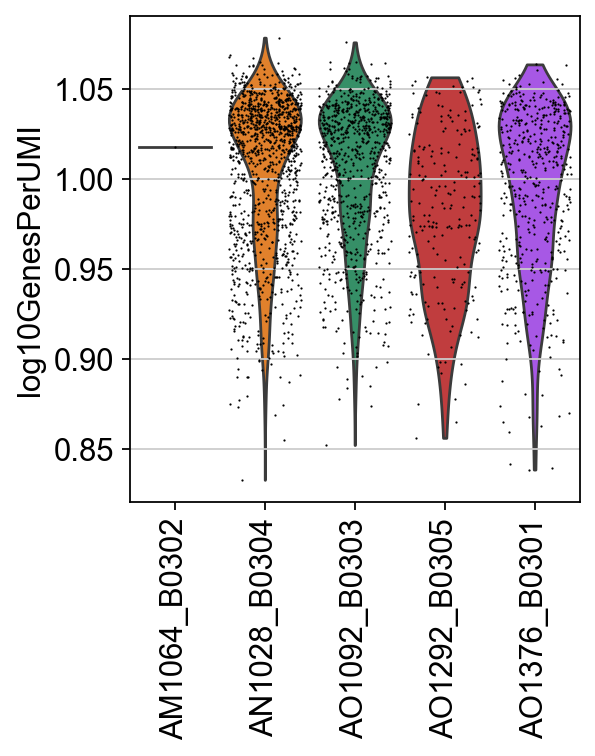

/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


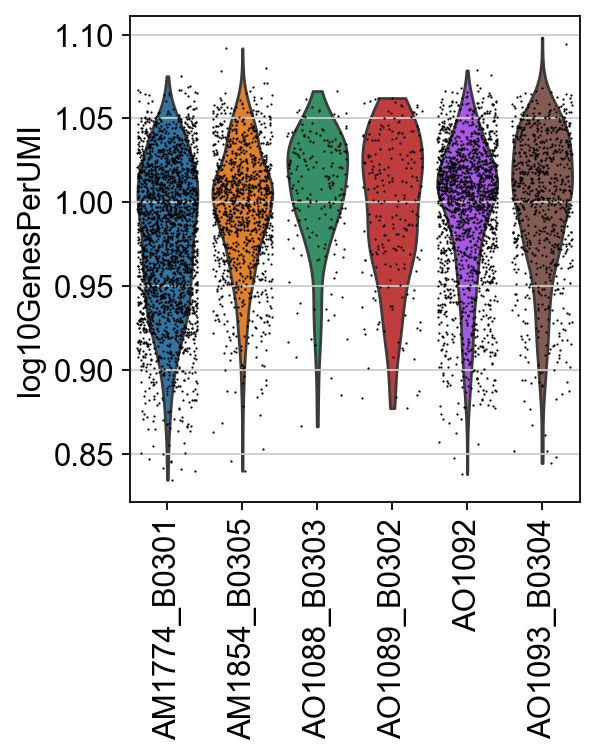

In [16]:
for x in range(0, len(adatas)):
    sc.pl.violin(adatas[x], ['log10GenesPerUMI'],
                 jitter=0.4, multi_panel=True, rotation=90, groupby='Classification')


## Concatenate adatas

In [17]:
adata = adatas[0].concatenate(adatas[1:], join='inner', batch_categories=['A', 'B', 'B_2','C','D','E'])

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_85324/3610754500.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adatas[0].concatenate(adatas[1:], join='inner', batch_categories=['A', 'B', 'B_2','C','D','E'])


In [18]:
adata

AnnData object with n_obs × n_vars = 32333 × 22323
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log10GenesPerUMI', 'Classification', '1660-Fosl2.752-library', '1661-Fhl2.467-library', '1663-Myc.989-library', '1665-Yap1.735-library', '1667-Atf4.1383-library', '1671-Nfkb2.152-library', '1673-Relb.286-library', '1676-Onecut2.2361-library', '1811-Itga2.672-library', '1999-Cldn4-951-library', '2114-Lif.1890-library', '2115-Fosl1.1401-library', '2118-Nfkb1.3737-library', 'shRenilla-library', 'GFP_count', 'Cre_count', 'library_id', 'Library', 'cLibrary', 'shRNA', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells-A', 'n_cells_by_counts-A', 'mean_counts-A', 'pct_dropout_by_counts-A', 'total_counts-A', 'highly_variable-A', 'means-A', 'dispersions-A', 'dispersions_norm-A', 'n_cells-B', 'n_cells_by_counts-B', 'mean_counts-B', 'pct_dropout_by_counts-B', 'total_counts-B', 'highly_variable-B', 'means-B', 'dispersions-B', 'dispersio

## Set highly variable genes

In [19]:
#sc.pp.highly_variable_genes(adata, batch_key="Classification", flavor='seurat_v3',n_top_genes=2000)
#sc.pp.highly_variable_genes(adata, batch_key="Classification")
sc.pp.highly_variable_genes(adata, batch_key='batch')

extracting highly variable genes


/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/chanj2/opt/miniconda3/envs/solo2/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is depreca

    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [20]:
adata.var.highly_variable_intersection['mKate2'] = False
adata.var.highly_variable_intersection['GFP'] = False
adata.var.highly_variable_intersection['Cre'] = False
for x in library:
    adata.var.highly_variable_intersection[x] = False

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_85324/1857412308.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var.highly_variable_intersection['mKate2'] = False
/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykern

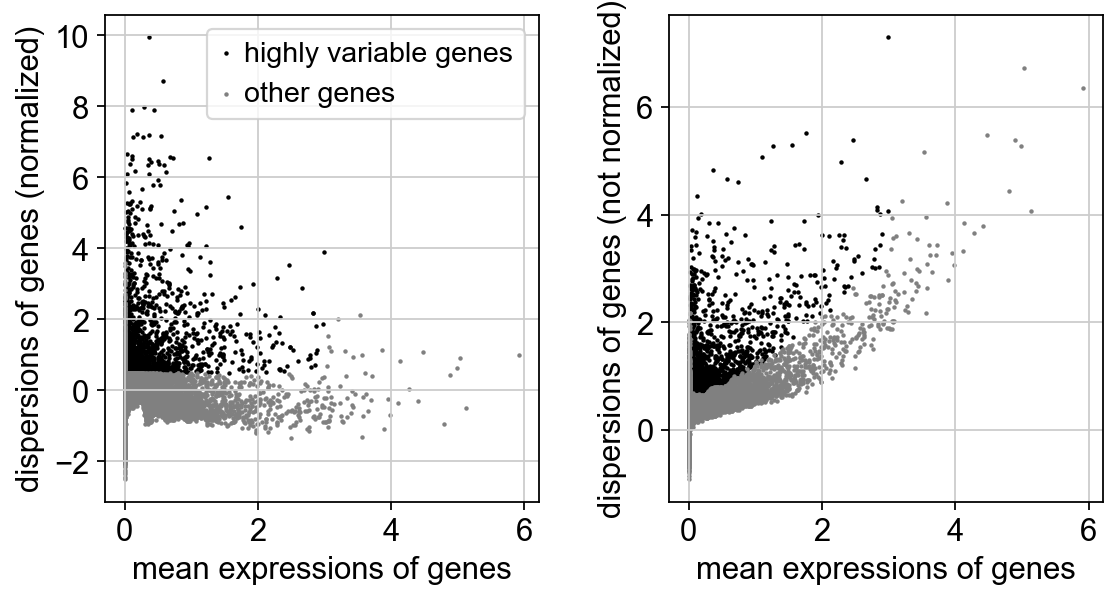

In [21]:
sc.pl.highly_variable_genes(adata)

In [22]:
adata.raw = adata

## Write allmice_screen_library1.h5ad

In [23]:
adata.write('write/allmice_screen_library1.h5ad', compression='gzip')